# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = pd.to_datetime(city_weather["dt"], unit="s")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | middletown
Processing Record 3 of Set 1 | zheleznodorozhnyy
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | ginir
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | ulluaya
Processing Record 8 of Set 1 | alice springs
Processing Record 9 of Set 1 | harar
Processing Record 10 of Set 1 | taltal
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | narrabri
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | lethem
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | myingyan
Processing Record 18 of Set 1 | richards bay
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | kandete
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | udachny
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,13.13,82,90,9.53,AU,2024-08-25 15:36:55
1,middletown,39.5151,-84.3983,31.19,61,0,2.06,US,2024-08-25 15:34:25
2,zheleznodorozhnyy,55.7503,38.0042,25.75,51,0,0.73,RU,2024-08-25 15:36:56
3,puerto natales,-51.7236,-72.4875,4.25,87,75,1.03,CL,2024-08-25 15:36:56
4,ginir,7.1333,40.7000,17.23,66,100,4.26,ET,2024-08-25 15:36:56


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,13.13,82,90,9.53,AU,2024-08-25 15:36:55
1,middletown,39.5151,-84.3983,31.19,61,0,2.06,US,2024-08-25 15:34:25
2,zheleznodorozhnyy,55.7503,38.0042,25.75,51,0,0.73,RU,2024-08-25 15:36:56
3,puerto natales,-51.7236,-72.4875,4.25,87,75,1.03,CL,2024-08-25 15:36:56
4,ginir,7.1333,40.7000,17.23,66,100,4.26,ET,2024-08-25 15:36:56


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

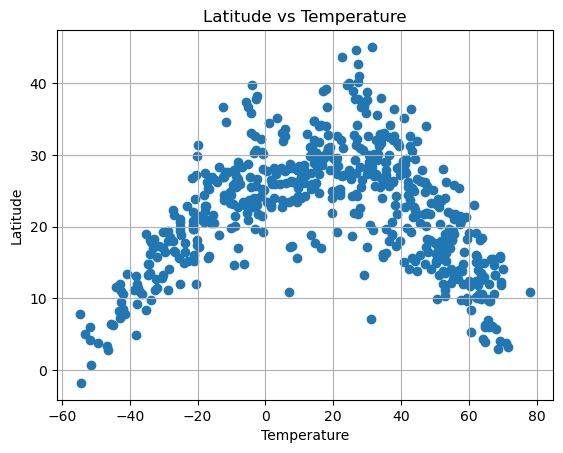

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.ylabel("Latitude")
plt.xlabel("Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

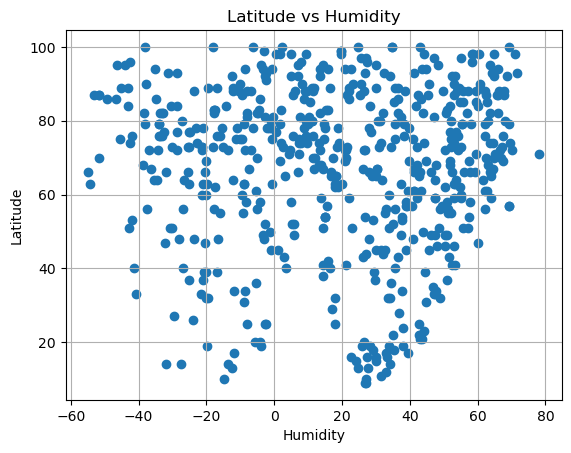

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

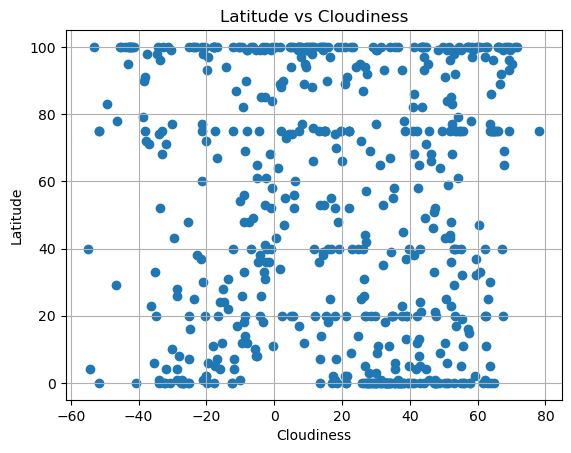

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

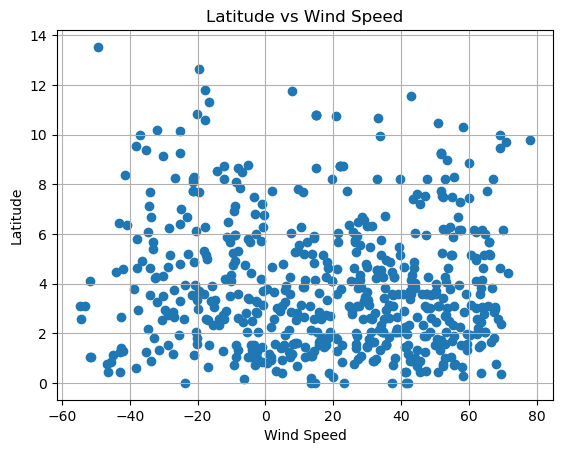

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def create_linear_regress(df,y,coord=(0,0)):
    x_values=df["Lat"]
    y_values=df[y]
    #A linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    #Create Linear Equation and Print 
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(y)
    plt.annotate(line_eq,coord,fontsize=15,color="red")
    plt.title(f"Latitude vs {y} ")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

The r-value is: 0.004275311280418372


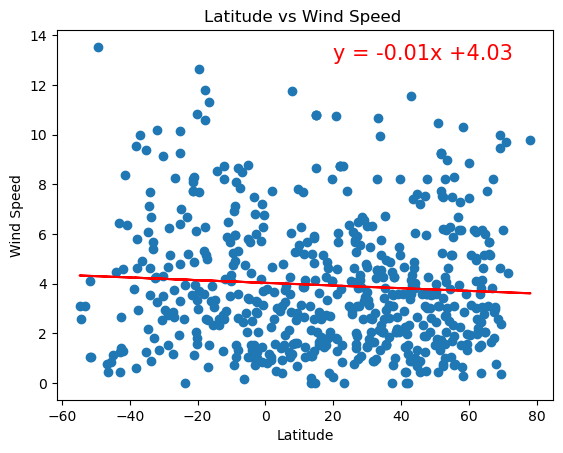

In [30]:
create_linear_regress(city_data_df,"Wind Speed",(20,13))

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,middletown,39.5151,-84.3983,31.19,61,0,2.06,US,2024-08-25 15:34:25
2,zheleznodorozhnyy,55.7503,38.0042,25.75,51,0,0.73,RU,2024-08-25 15:36:56
4,ginir,7.1333,40.7000,17.23,66,100,4.26,ET,2024-08-25 15:36:56
5,lihue,21.9789,-159.3672,24.77,89,75,8.75,US,2024-08-25 15:36:56
6,ulluaya,42.3738,47.3745,14.12,87,58,2.33,RU,2024-08-25 15:36:56


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,13.13,82,90,9.53,AU,2024-08-25 15:36:55
3,puerto natales,-51.7236,-72.4875,4.25,87,75,1.03,CL,2024-08-25 15:36:56
7,alice springs,-23.7000,133.8833,17.75,48,25,0.00,AU,2024-08-25 15:36:56
9,taltal,-25.4000,-70.4833,15.63,73,48,1.91,CL,2024-08-25 15:36:56
10,port-aux-francais,-49.3500,70.2167,3.73,86,83,13.53,TF,2024-08-25 15:36:56


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.41747351373296004


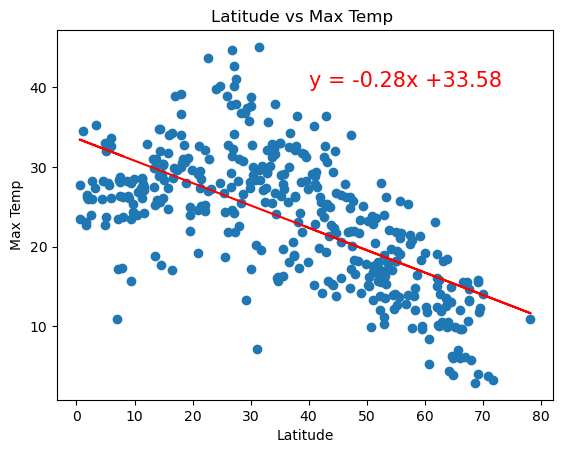

In [34]:
# Linear regression on Northern Hemisphere
create_linear_regress(northern_hemi_df,"Max Temp",(40,40))


The r-value is: 0.7014600424501574


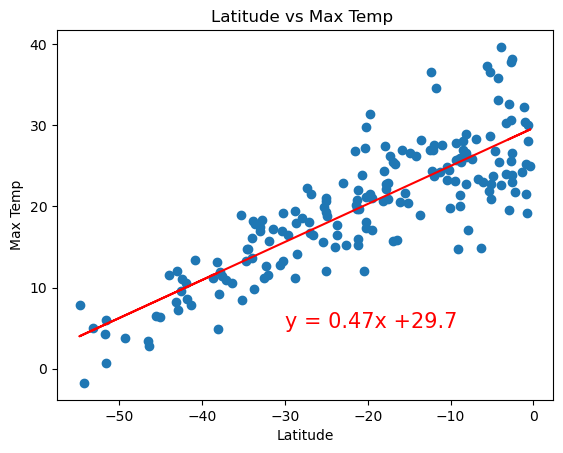

In [37]:
# Linear regression on Southern Hemisphere
create_linear_regress(southern_hemi_df,"Max Temp",(-30,5))

**Discussion about the linear relationship:** The linear regression of the temperature versus the latitude in the northern hemisphere indicates that in this part of our dataframe the weather tends to have a moderate correlation between the max temp and latitude. The r-value is 0.4 , and you can visually see that the point on the graph are more spread out. Compared to the Southern Hemisphere with an r-value of 0.7 and seems to have a higher correlation between the latitude and temperature. On the graph you can see the points more clustered together and both elevating in the same direction.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0017730461350757875


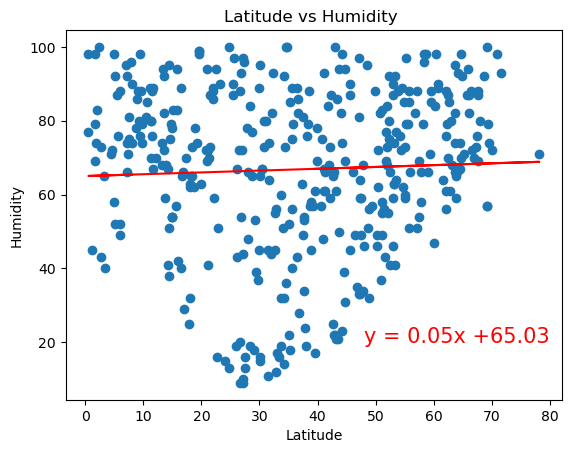

In [41]:
# Northern Hemisphere
create_linear_regress(northern_hemi_df,"Humidity",(48,20))

The r-value is: 0.014203764901862686


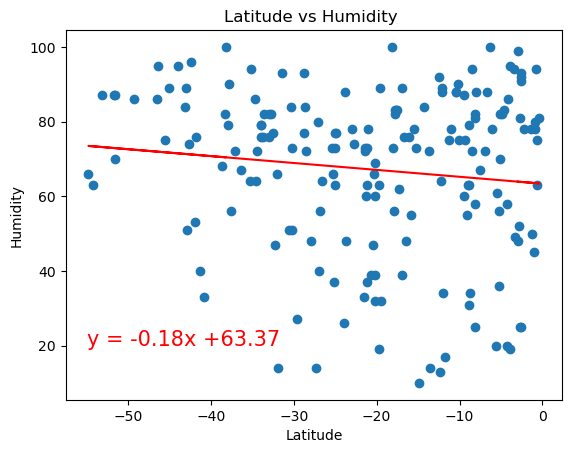

In [43]:
# Southern Hemisphere
create_linear_regress(southern_hemi_df,"Humidity",(-55,20))

**Discussion about the linear relationship:** The regression line between the humidity and latitude seem to have no correlation. It is visually noticable in the linear regression graphs above, that there are sparatic points pasted across the entire graph. In the northern hemisphere there is an r-value of 0.001 which again indicates no correlation. In the southern hemisphere the r-value is higher at 0.01 but still no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0012347724094092564


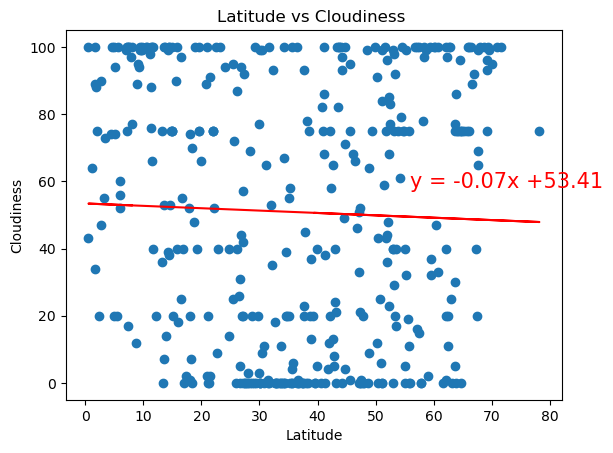

In [48]:
# Northern Hemisphere
create_linear_regress(northern_hemi_df,"Cloudiness",(56,58))

The r-value is: 0.006210917946422061


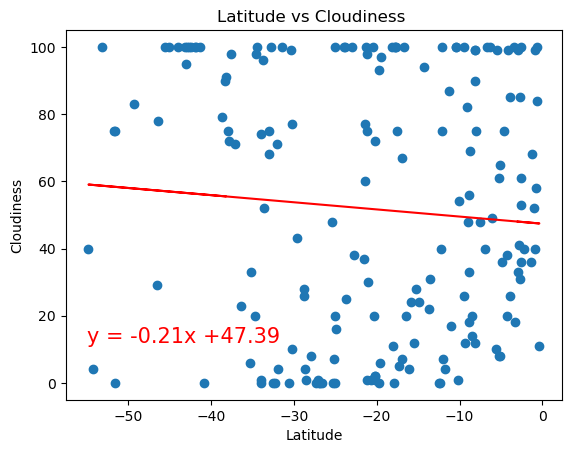

In [52]:
# Southern Hemisphere
create_linear_regress(southern_hemi_df,"Cloudiness",(-55,12))

**Discussion about the linear relationship:** The northern hemisphere has an r-value of 0.0012347724094092564. The Southern Hemisphere has an r-value of 0.006210917946422061. There is no correlation between latitude and cloudiness. The graphs depict points all across the graph without a specific pattern.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.010795874122950772


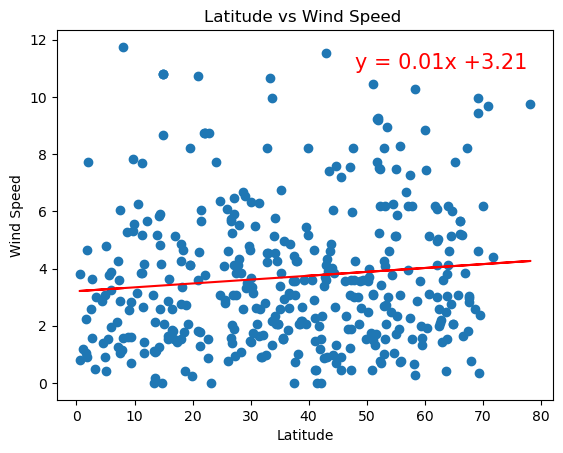

In [54]:
# Northern Hemisphere
create_linear_regress(northern_hemi_df,"Wind Speed",(48,11))

The r-value is: 3.199825669110622e-05


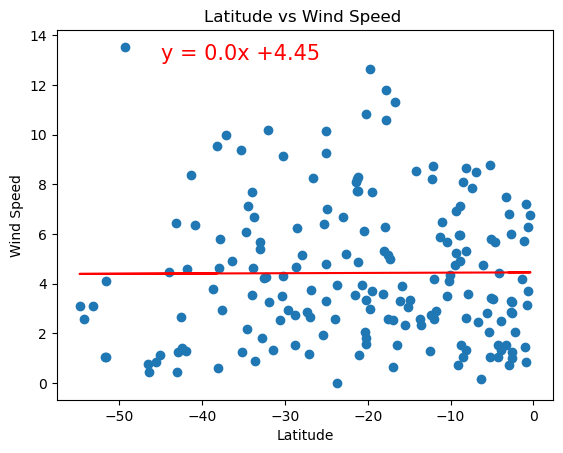

In [56]:
# Southern Hemisphere
create_linear_regress(southern_hemi_df,"Wind Speed",(-45,13))

**Discussion about the linear relationship:** Linear regression between the latitude and wind speeds have zero to no correlation in the Northern Hemisphere. The r-value in the northern hemisphere is 0.01. While the southern hemisphere is 3.19. The southern hemisphere is more clustered together but still a not much correlation to go off of.